This notebook contains code cells that I didn't use in the benchmarking process. I'm keeping them here for future reference.

In [ ]:
def degDisBRKGA(filename, G, n, m, algoname, graphname):
    """
    Extract the result of BRKGA from the output file and plot the degree distribution of the nodes
    Parameters:
        filename: the name of the output file
        G: the graph
        n: number of vertices
        m: number of edges
    """
    input = open(filename, "r")
    while True:
        line = input.readline()
        if not line: break
        if line[:6] == "Finish":
            x = line.split()
            time, result = float(x[1]), int(x[2])
            nodes = [int(val) for val in x[4:]]
            break

    # degree distribution of nodes
    degree = np.array([len(G[i]) for i in range(n)])
    degreeDist = np.array([0 for _ in range(n)])
    for node in nodes:
        degreeDist[degree[node]] += 1
    # scatter plot degree distribution
    plt.figure(figsize=(10, 6))
    # plot log value instead of log scale
    plt.scatter(np.log10(np.arange(1, n+1, 1)), np.log10(degreeDist+1), label="BRKGA")
    plt.xlabel("Degree")
    plt.ylabel("Number of nodes")
    plt.title("Degree distribution of " + algoname + " result on " + graphname)
    plt.show()

def degDisMDG(filename, G, n, m):
    input = open(filename, "r") # take first line
    x = input.readline().split()
    time, result = float(x[0]), int(x[2])
    nodes = [int(val) for val in x[3:]]
    # degree distribution of nodes
    degree = np.array([len(G[i]) for i in range(n)])
    degreeDist = np.array([0 for _ in range(n)])
    for node in nodes:
        degreeDist[degree[node]] += 1
    # scatter plot degree distribution
    plt.figure(figsize=(10, 6))
    # plot log value instead of log scale
    plt.scatter(np.log10(np.arange(1, n+1, 1)), np.log10(degreeDist+1), label="MDG")
    plt.xlabel("Degree")
    plt.ylabel("Number of nodes")
    plt.title("Degree distribution of MDG result")
    # plt.legend()
    plt.show()

def degDisReverse(filename, G, n, m, algoname, graphname):
    input = open(filename, "r") # take first line
    x = input.readline().split()
    result = int(x[0])
    nodes = [int(val) for val in x[1:]]
    # degree distribution of nodes
    degree = np.array([len(G[i]) for i in range(n)])
    degreeDist = np.array([0 for _ in range(n)])
    for node in nodes:
        degreeDist[degree[node]] += 1
    # scatter plot degree distribution
    plt.figure(figsize=(10, 6))
    # plot log value instead of log scale
    plt.scatter(np.log10(np.arange(1, n+1, 1)), np.log10(degreeDist+1), label="Reverse")
    plt.xlabel("Degree")
    plt.ylabel("Number of nodes")
    plt.title("Degree distribution of " + algoname + " result on " + graphname)
    # plt.legend()
    plt.show()

def degDisCmp(filename1, filename2, G, n, m, algoname1, algoname2, graphname):
    """
    Extract the result of BRKGA and Reverse from the output file and plot the degree distribution of the nodes
    Parameters:
        filename: the name of the output file
        G: the graph
        n: number of vertices
        m: number of edges
    """
    input = open(filename1, "r")
    while True:
        line = input.readline()
        if not line: break
        if line[:6] == "Finish":
            x = line.split()
            time, result = float(x[1]), int(x[2])
            nodes = [int(val) for val in x[4:]]
            break

    # degree distribution of nodes
    degree = np.array([len(G[i]) for i in range(n)])
    degreeDist = np.array([0 for _ in range(n)])
    for node in nodes:
        degreeDist[degree[node]] += 1
    # create 2 plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
    # plot log value instead of log scale
    ax1.scatter(np.log10(np.arange(1, n+1, 1)), np.log10(degreeDist+1), label=algoname1)
    ax1.set_xlabel("Degree", fontsize=14)
    ax1.set_ylabel("Number of nodes", fontsize=14)
    ax1.set_title(algoname1 + " result on " + graphname, fontsize=18)

    input = open(filename2, "r") # take first line
    x = input.readline().split()
    result = int(x[0])
    nodes = [int(val) for val in x[1:]]
    # degree distribution of nodes
    degree = np.array([len(G[i]) for i in range(n)])
    degreeDist = np.array([0 for _ in range(n)])
    for node in nodes:
        degreeDist[degree[node]] += 1
    # plot log value instead of log scale
    ax2.scatter(np.log10(np.arange(1, n+1, 1)), np.log10(degreeDist+1), label=algoname2)
    ax2.set_xlabel("Degree", fontsize=14)
    ax2.set_ylabel("Number of nodes", fontsize=14)
    ax2.set_title(algoname2 + " result on " + graphname, fontsize=18)

    plt.show()

In [ ]:
def compareResult(a, b):
    """Compare column a to column b"""
    percentage = (b - a) / b * 100
    # round 2 decimal
    percentage = np.round(percentage, 2)
    # display percentage with graphname
    print(percentage)
    average = sum(percentage) / len(percentage)
    average = np.round(average, 2)
    print(average)

def compareResultBig(a, b, threshold):
    """Compare column a to column b but only for row with more than threshold vertices"""
    # find row with more than threshold vertices
    index = df.index[df["vertices"] > threshold].tolist()
    # compare column a to column b
    compareResult(a[index], b[index])

In [ ]:
def evolutionBRKGA(filename):
    input = open(filename, "r")
    # read all lines
    lines = input.readlines()
    experiment = []
    iter = []
    for line in lines:
        if line[:6] == "Finish":
            x = line.split()
            time, result, generation = float(x[1]), int(x[2]), int(x[3])
            experiment.append(iter)
            iter = []
        else:
            x = line.split()
            time, generation, result = float(x[0]), int(x[1]), int(x[2])
            iter.append((time, generation, result))
    return experiment

def evolutionPlot(filename, G, n, m):
    """
    Extract the solution evolution of BRKGA from the list of output file and plot the solution evolution 
    Parameters:
        filename: the name of the output file
        G: the graph
        n: number of vertices
        m: number of edges
    """
    experiment = evolutionBRKGA(filename)
    # plot experiment[0] and highlight as red point
    plt.figure(figsize=(10, 6))
    plt.plot([x[0] for x in experiment[0]], [x[2] for x in experiment[0]], 'ro')
    plt.plot([x[0] for x in experiment[0]], [x[2] for x in experiment[0]], 'b')
    plt.xlabel("Time")
    plt.ylabel("Result")
    plt.title("Solution evolution of BRKGA")
    plt.show()

3898 137567


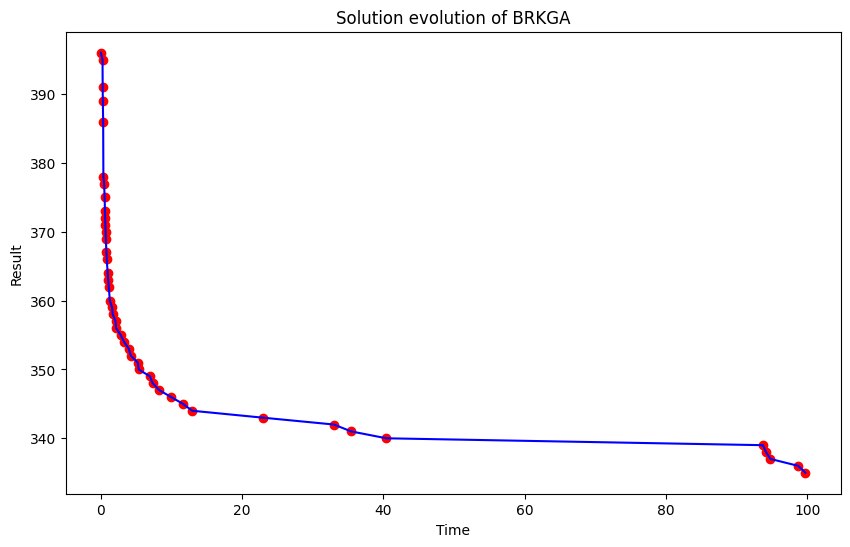

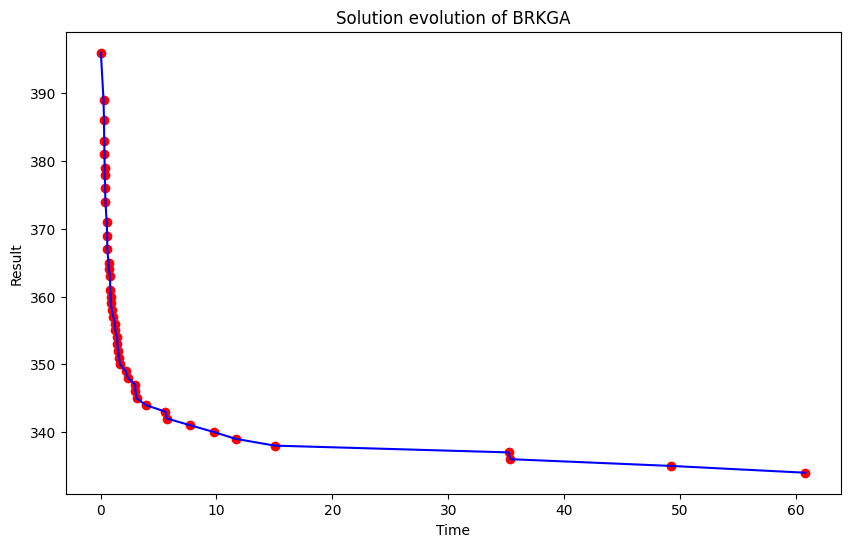

In [ ]:
# extract Brandeis99 graph
filename = "../dataset/socfb-Brandeis99/socfb-Brandeis99.mtx"
input = open(filename, "r")
input.readline() # skip first line
n, _, m = map(int, input.readline().split())
G = [[] for _ in range(n)]
for _ in range(m):
    u, v = map(int, input.readline().split())
    G[u-1].append(v-1)
    G[v-1].append(u-1)
input.close()
print(n, m)

# extractBRKGA("benchmark/Brandeis99/BRKGA.txt", G, n, m)
evolutionPlot("benchmark/Brandeis99/BRKGA.txt", G, n, m)
evolutionPlot("benchmark/Brandeis99/fastBRKGA.txt", G, n, m)

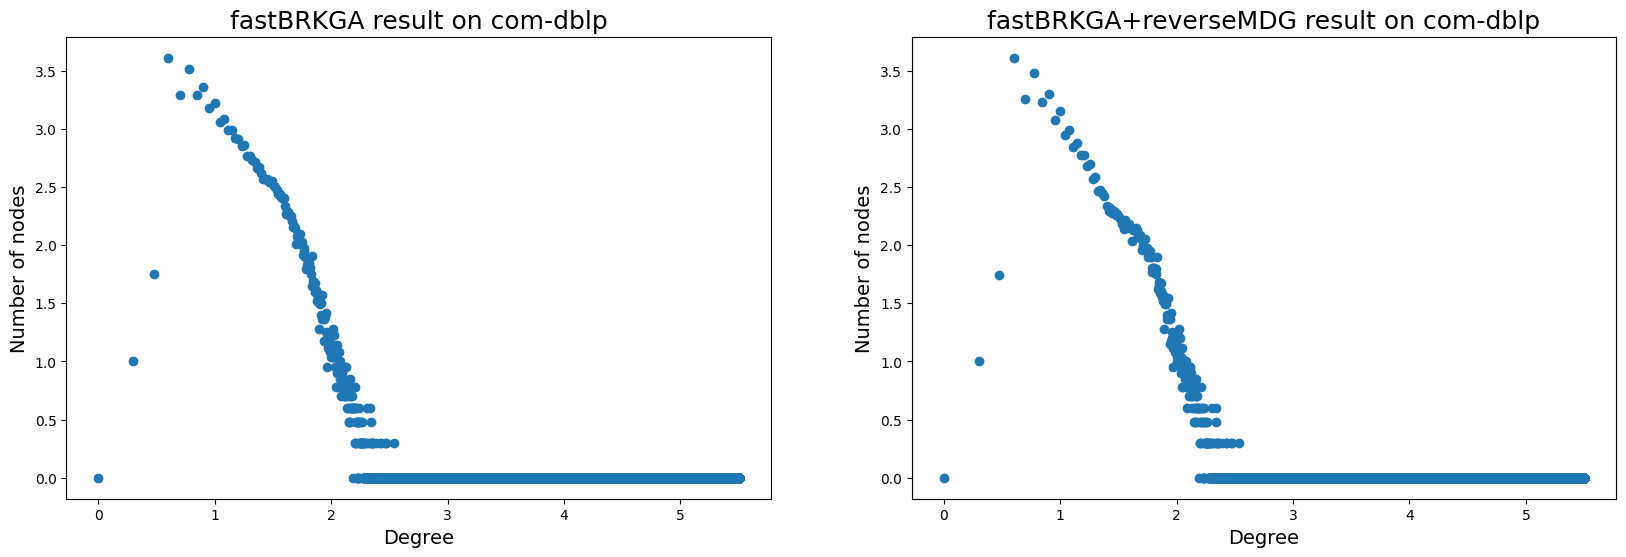

In [ ]:
def com_dblp():
    # extract com-dblp graph
    filename = "../dataset/com-dblp/com-dblp.ungraph.txt"
    input = open(filename, "r")
    for _ in range(4):  input.readline() # skip 4 lines
    n, m = 317080, 1049866
    G = [[] for _ in range(n)]
    id = {}
    cnt = 0
    while True:
        line = input.readline()
        if not line: break
        u, v = map(int, line.split())
        if u not in id: id[u] = cnt; cnt += 1
        if v not in id: id[v] = cnt; cnt += 1
        G[id[u]].append(id[v])
        G[id[v]].append(id[u])
    input.close()
    return G, n, m

G, n, m = com_dblp()
degDisCmp("benchmark/com-dblp/fastBRKGA.txt", "benchmark/com-dblp/fastBRKGAreverse.txt", G, n, m, "fastBRKGA", "fastBRKGA+reverseMDG", "com-dblp")

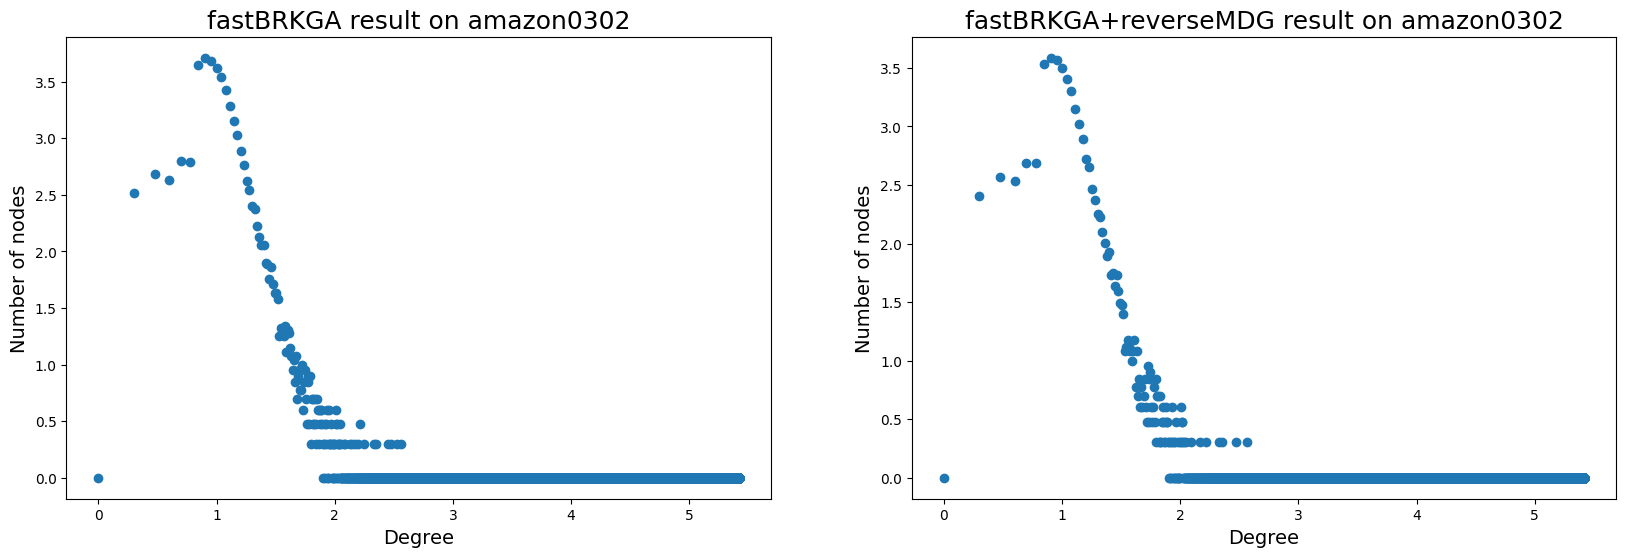

In [ ]:
def amazon0302():
    # extract amazon0302 graph
    filename = "../dataset/amazon/amazon0302.txt"
    input = open(filename, "r")
    for _ in range(4):  input.readline() # skip 4 lines
    n, m = 262111, 899792
    G = [[] for _ in range(n)]
    id = {}
    cnt = 0
    while True:
        line = input.readline()
        if not line: break
        u, v = map(int, line.split())
        if u not in id: id[u] = cnt; cnt += 1
        if v not in id: id[v] = cnt; cnt += 1
        G[id[u]].append(id[v])
        G[id[v]].append(id[u])
    input.close()
    return G, n, m

G, n, m = amazon0302()
degDisCmp("benchmark/amazon0302/fastBRKGA.txt", "benchmark/amazon0302/fastBRKGAreverse.txt", G, n, m, "fastBRKGA", "fastBRKGA+reverseMDG", "amazon0302")

In [ ]:
# extract HepPh graph
filename = "../dataset/ca-HepPh/ca-HepPh.txt"
input = open(filename, "r")
for _ in range(4):  input.readline() # skip 4 lines
n, m = 12008, 118489
G = [[] for _ in range(n)]
id = {}
cnt = 0
while True:
    line = input.readline()
    if not line: break
    u, v = map(int, line.split())
    if u not in id: id[u] = cnt; cnt += 1
    if v not in id: id[v] = cnt; cnt += 1
    if u == v: continue
    G[id[u]].append(id[v])
    G[id[v]].append(id[u])
input.close()

In [ ]:
# extract email-Enron graph
def emailEnron():
    filename = "../dataset/email-Enron/email-Enron.txt"
    input = open(filename, "r")
    for _ in range(4):  input.readline() # skip 4 lines
    n, m = 36692, 183831
    G = [[] for _ in range(n)]
    id = {}
    cnt = 0
    while True:
        line = input.readline()
        if not line: break
        u, v = map(int, line.split())
        if u not in id: id[u] = cnt; cnt += 1
        if v not in id: id[v] = cnt; cnt += 1
        G[id[u]].append(id[v])
    input.close()
    return G, n, m

def AstroPh():
    filename = "../dataset/ca-AstroPh/out.ca-AstroPh"
    input = open(filename, "r")
    for _ in range(2): input.readline() # skip 2 lines
    n, m = 18771, 198050
    G = [[] for _ in range(n)]
    while True:
        line = input.readline()
        if not line: break
        u, v = map(int, line.split())
        u -= 1; v -= 1
        G[u].append(v)
        G[v].append(u)
    input.close()
    return G, n, m

def egofacebook():
    filename = "../dataset/fb/facebook_combined.txt"
    input = open(filename, "r")
    n, m = 4039, 88234
    G = [[] for _ in range(n)]
    while True:
        line = input.readline()
        if not line: break
        u, v = map(int, line.split())
        G[u].append(v)
        G[v].append(u)
    input.close()
    return G, n, m

196591 950327


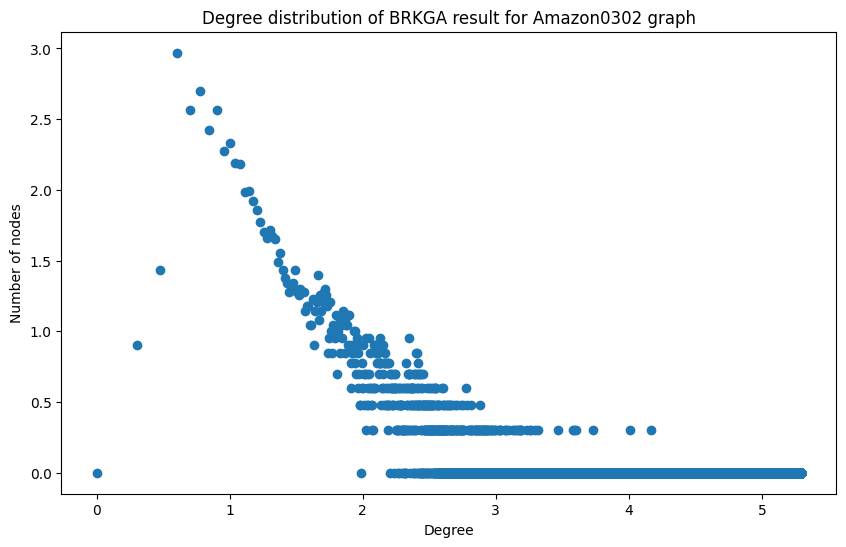

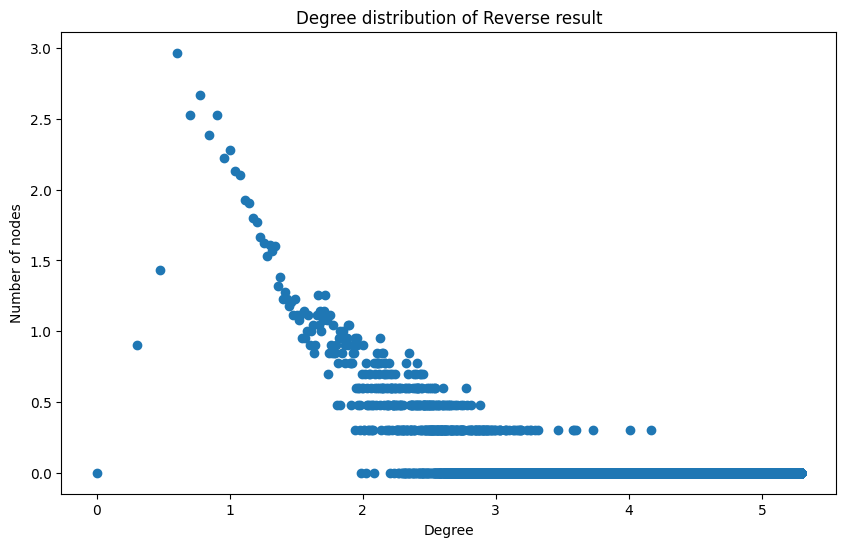

In [ ]:
# extract loc-gowalla graph
filename = "../dataset/loc-gowalla/loc-gowalla_edges.txt"
input = open(filename, "r")
n, m = 196591, 950327
G = [[] for _ in range(n)]
while True:
    line = input.readline()
    if not line: break
    u, v = map(int, line.split())
    G[u].append(v)
input.close()
print(n, m)

extractBRKGA("benchmark/loc-gowalla/BRKGA.txt", G, n, m)
extractReverse("benchmark/loc-gowalla/BRKGAreverse.txt", G, n, m)

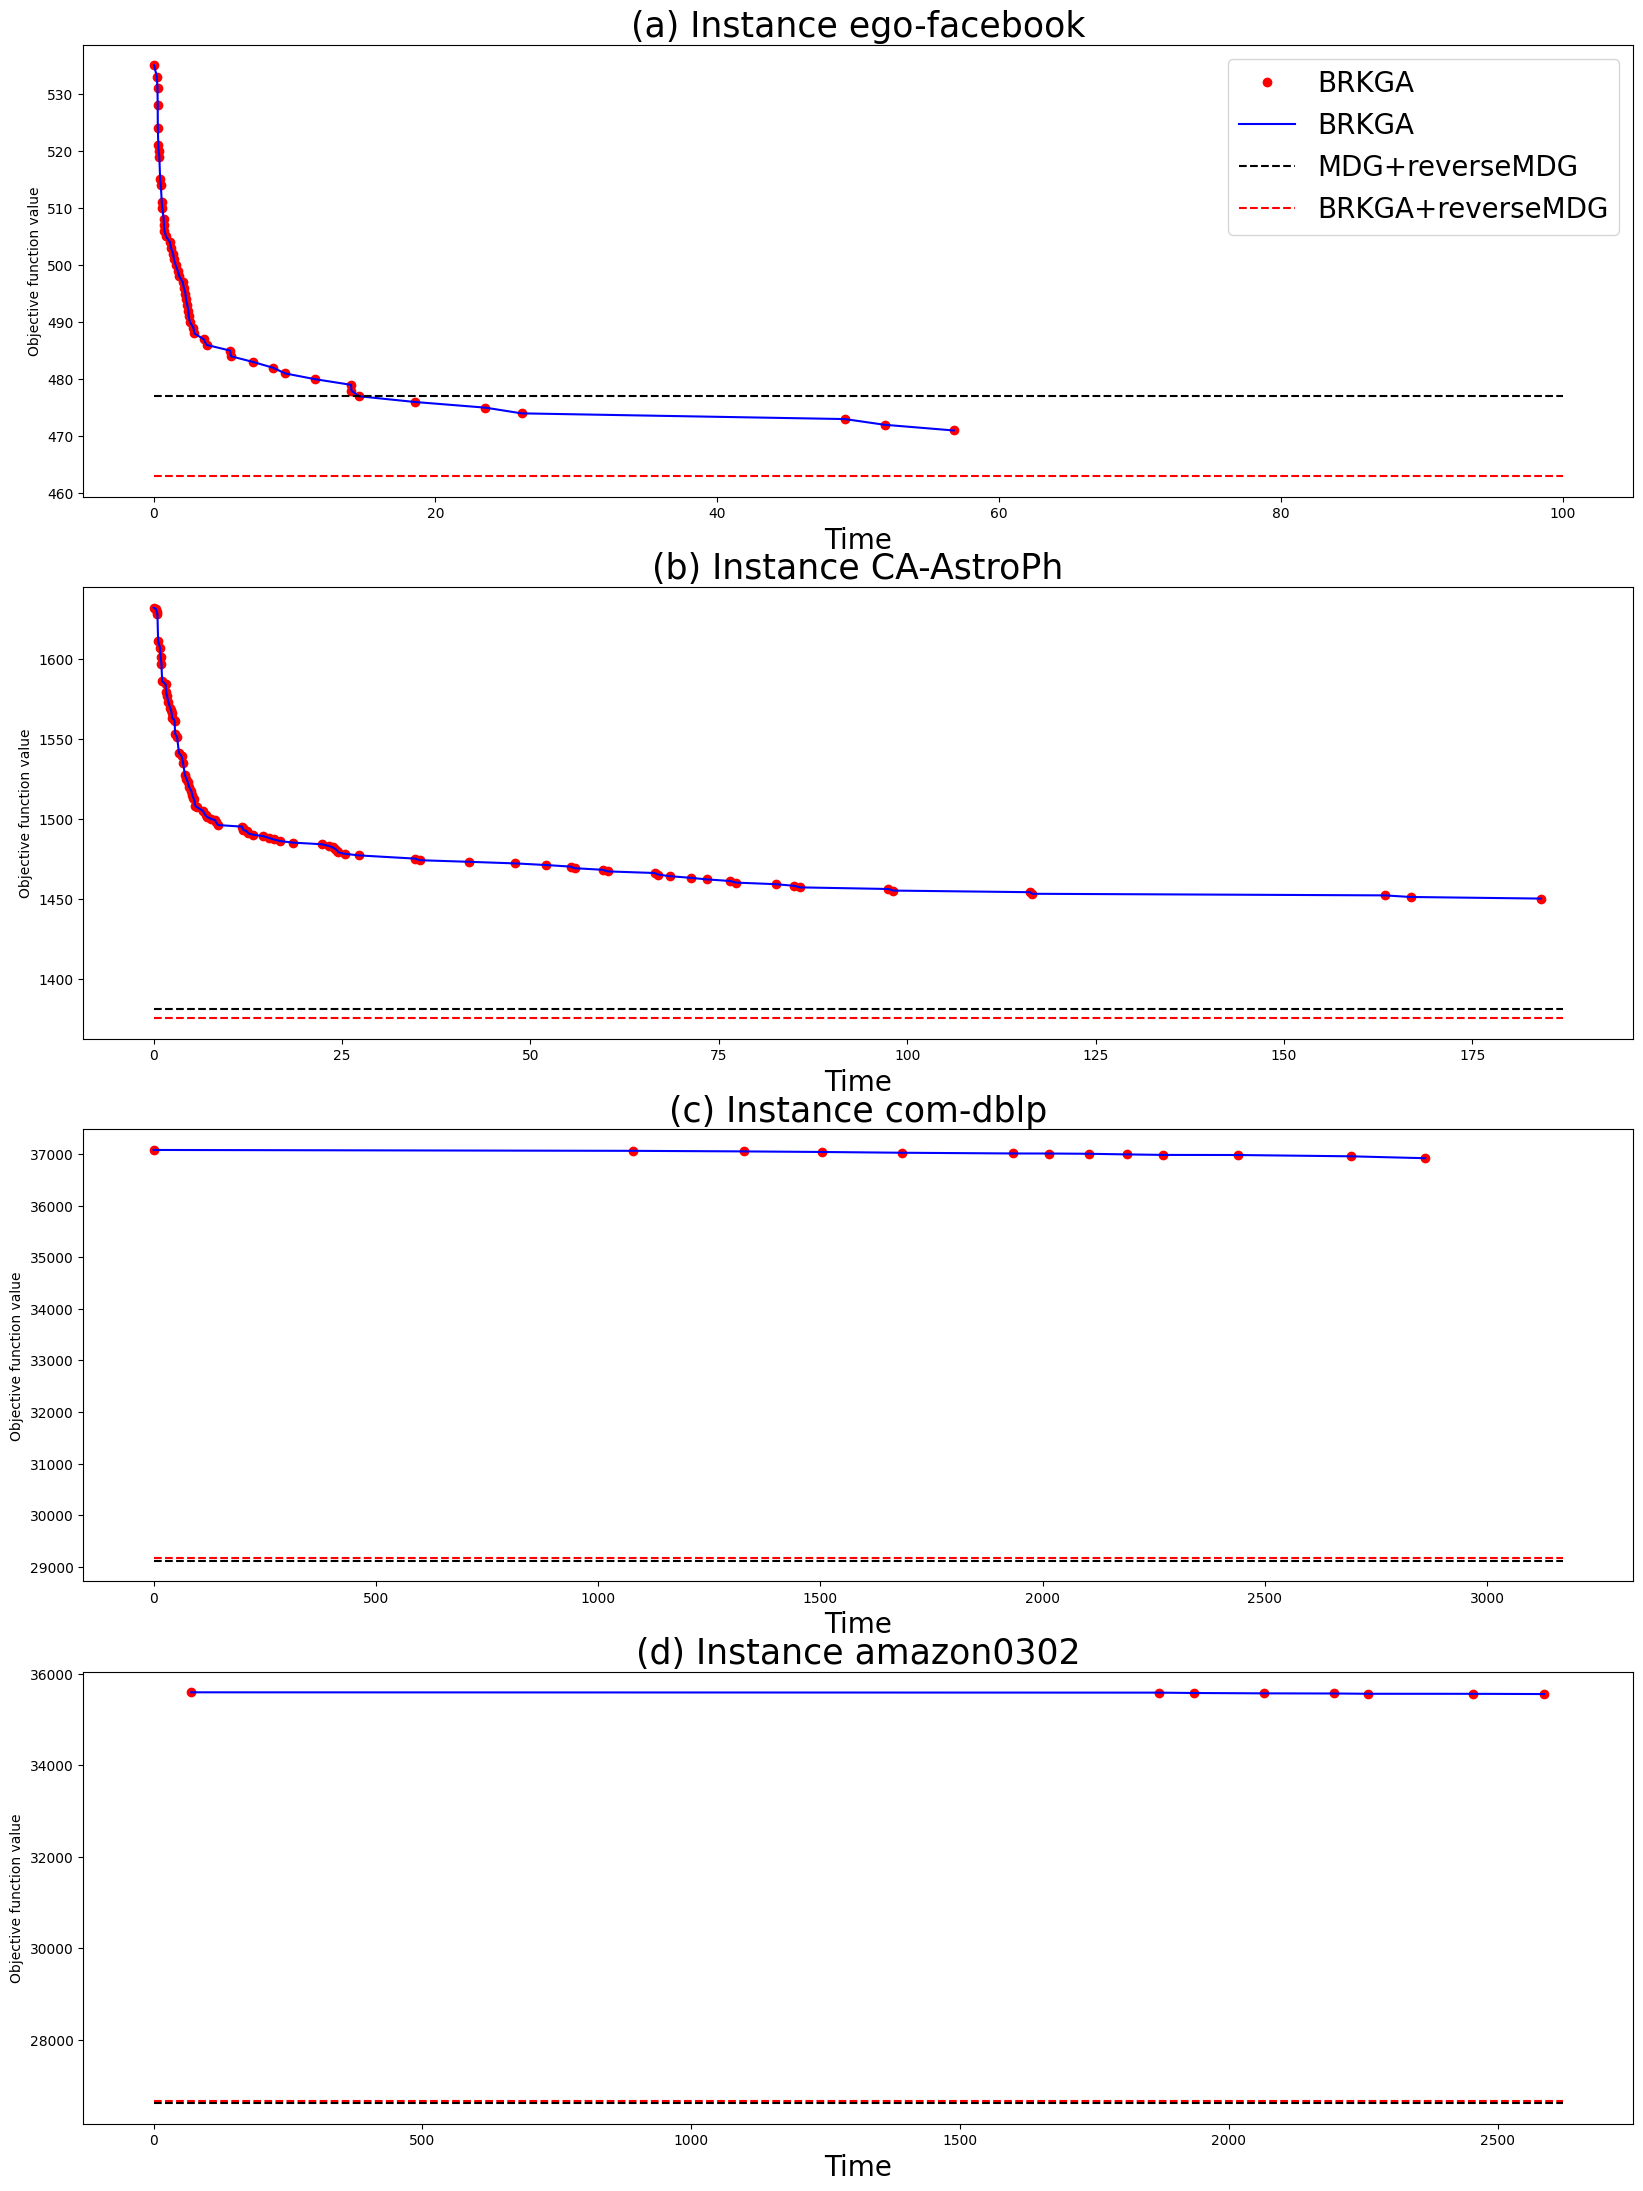

In [ ]:
# plot BRKGA evolution in 4 graphs
# email-Enron, ego_facebook: BRKGA better than MDG+reverseMDG
# CA-AstroPh, gemsec_facebook_artist: BRKGA worse than MDG+reverseMDG, BRKGA+reverseMDG is the best
# com-dblp, amazon0302: MDG+reverseMDG is the best
# draw dashed line of MDG+reverseMDG value
# draw another dash line of BRKGA+reverseMDG value
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 27))

G, n, m = egofacebook()
experiment = evolutionBRKGA("benchmark/fb/BRKGA.txt")
ax1.plot([x[0] for x in experiment[0]], [x[2] for x in experiment[0]], 'ro', label="BRKGA")
ax1.plot([x[0] for x in experiment[0]], [x[2] for x in experiment[0]], 'b', label="BRKGA")
ax1.set_title("(a) Instance ego-facebook")
ax1.plot([0, 100], [477, 477], 'k--', label="MDG+reverseMDG")
ax1.plot([0, 100], [463, 463], 'r--', label="BRKGA+reverseMDG")
ax1.legend(loc='upper right', fontsize=20)

G, n, m = AstroPh()
experiment = evolutionBRKGA("benchmark/Astro/BRKGA.txt")
ax2.plot([x[0] for x in experiment[0]], [x[2] for x in experiment[0]], 'ro', label="BRKGA")
ax2.plot([x[0] for x in experiment[0]], [x[2] for x in experiment[0]], 'b', label="BRKGA")
ax2.set_title("(b) Instance CA-AstroPh")
ax2.plot([0, 187], [1381, 1381], 'k--', label="MDG+reverseMDG")
ax2.plot([0, 187], [1375, 1375], 'r--', label="BRKGA+reverseMDG")

G, n, m = com_dblp()
experiment = evolutionBRKGA("benchmark/com-dblp/BRKGA.txt")
ax3.plot([x[0] for x in experiment[0]], [x[2] for x in experiment[0]], 'ro', label="BRKGA")
ax3.plot([x[0] for x in experiment[0]], [x[2] for x in experiment[0]], 'b', label="BRKGA")
ax3.set_title("(c) Instance com-dblp")
ax3.plot([0, 3170], [29114, 29114], 'k--', label="MDG+reverseMDG")
ax3.plot([0, 3170], [29170, 29170], 'r--', label="BRKGA+reverseMDG")

G, n, m = amazon0302()
experiment = evolutionBRKGA("benchmark/amazon0302/BRKGA.txt")
ax4.plot([x[0] for x in experiment[0]], [x[2] for x in experiment[0]], 'ro', label="BRKGA")
ax4.plot([x[0] for x in experiment[0]], [x[2] for x in experiment[0]], 'b', label="BRKGA")
ax4.set_title("(d) Instance amazon0302")
ax4.plot([0, 2621], [26618, 26618], 'k--', label="MDG+reverseMDG")
ax4.plot([0, 2621], [26665, 26665], 'r--', label="BRKGA+reverseMDG")

# set x, y label
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlabel("Time")
    ax.set_ylabel("Objective function value")
# increase fontsize of all titles, x, y labels
for ax in [ax1, ax2, ax3, ax4]:
    ax.title.set_fontsize(25)
    ax.xaxis.label.set_fontsize(20)